In [1]:
from pricing.cost_calculator.cost_calculator import CostCalculator
from pricing.openei_tariff.openei_tariff_analyzer import *
from pricing.cost_calculator.tariff_structure import *
import datetime as dtime
import matplotlib.pyplot as plt

In [2]:
ciee_tariff = OpenEI_tariff(utility_id='14328',
                  sector='Commercial',
                  tariff_rate_of_interest='A-1 Small General Service',  # need to add Small General Service to get the right data ..
                  distrib_level_of_interest=None,
                  phasewing='Single',
                  tou=True)

In [3]:
calculator = CostCalculator()

In [4]:
ciee_tariff.read_from_json()

0

In [5]:
tariff_struct_from_openei_data(ciee_tariff, calculator, pdp_event_filenames='PDP_events.json')

In [6]:
pd_prices, map_prices = calculator.get_electricity_price(timestep=TariffElemPeriod.HOURLY,
                                                        range_date=(dtime.datetime(2018,
                                                                                      7,
                                                                                      25, 0, 0, 0).replace(tzinfo=pytz.timezone('US/Pacific')),
                                                                    dtime.datetime(2018,
                                                                                      7,
                                                                                      25, 23, 59,
                                                                                      59).replace(tzinfo=pytz.timezone('US/Pacific'))))
pd_prices = pd_prices.fillna(0)
energyPrices = pd_prices.customer_energy_charge.values + pd_prices.pdp_non_event_energy_credit.values + pd_prices.pdp_event_energy_charge.values
demandPrices = pd_prices.customer_demand_charge_season.values + pd_prices.pdp_non_event_demand_credit.values + pd_prices.customer_demand_charge_tou.values


In [7]:
energyPrices

array([0.2073 , 0.2073 , 0.2073 , 0.2073 , 0.2073 , 0.2073 , 0.2073 ,
       0.2073 , 0.23465, 0.23465, 0.23465, 0.23465, 0.2583 , 0.2583 ,
       0.8583 , 0.8583 , 0.8583 , 0.8583 , 0.23465, 0.23465, 0.23465,
       0.2073 , 0.2073 , 0.2073 ])

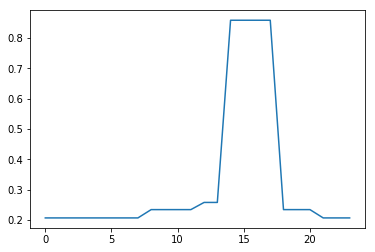

In [16]:
plt.plot(energyPrices)

In [2]:
from calc_price import calc_total_price
import datetime as dtime
import numpy as np
import pandas as pd

In [ ]:
{'distrib_level_of_interest': nan, 
 'option_exclusion': nan, 
 'phasewing': 'Single', 
 'sector': 'Commercial', 
 'tariff_rate_of_interest': 'A-1 Small General Service', 
 'tou': True, 
 'utility_id': 14328}

In [3]:
tariff_options = {
        'utility_id': '14328',
        'sector': 'Commercial',
        'tariff_rate_of_interest': 'A-1 Small General Service', 
        'distrib_level_of_interest': None, #TODO: Figure out what this is
        'phasewing': 'Single',
        'tou': True
    }

In [4]:
start = dtime.datetime(2018,7,25, 0, 0, 0).replace(tzinfo=pytz.timezone('US/Pacific'))

end = dtime.datetime(2018,7,25, 23, 59,59).replace(tzinfo=pytz.timezone('US/Pacific'))

In [5]:
power_vector = pd.Series(np.ones(4*24))

In [6]:
calc_total_price(power_vector, tariff_options, start, end)

tariff data_openei
None


ValueError: shapes (24,) and (32,) not aligned: 24 (dim 0) != 32 (dim 0)

In [ ]:
pd.timedelta_range(start=)

In [7]:
pd.datetime(hour=14)

TypeError: Required argument 'year' (pos 1) not found